BI Projekt - Topmotive

Zugriff auf die Daten:

In [1569]:
import pandas as pd

In [1570]:
df_Verrechnung = pd.read_csv('TM_WA_Verrechnungssätze.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")
df_Verrechnung

,LocalID,AWArt,AWArt_Bez,VKPreis,VKPreis_Brutto,EKPreis,AWMinuten,c_date
0,0007BD7B-6934-4893-B971-CCA4857B1789,EL,Elektrikarbeiten,"12,40","14,76","6,80","6,00",01.07.2023 11:29:12
1,0007BD7B-6934-4893-B971-CCA4857B1789,KA,Karosseriearbeiten,"13,00","15,47","6,80","6,00",01.07.2023 11:29:12
2,0007BD7B-6934-4893-B971-CCA4857B1789,LA,Lackierarbeiten,"13,00","15,47","6,80","6,00",01.07.2023 11:29:12
3,0007BD7B-6934-4893-B971-CCA4857B1789,NaN,Verrechnungssatz Autohaus Zorn,"85,71","102,00","6,90","6,00",01.07.2023 11:29:12
4,0007BD7B-6934-4893-B971-CCA4857B1789,WS,Werkstattarbeiten,"10,30","12,26","6,30","6,00",01.07.2023 11:29:12
...,...,...,...,...,...,...,...,...
12059,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,VL,Versicherung Lack,"165,50","196,95","165,50","60,00",01.08.2023 05:59:20
12060,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,VM,Versicherung Mechanik,"135,50","161,25","135,50","60,00",01.08.2023 05:59:20
12061,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,WS,Werkstattarbeiten,"110,50","131,50","0,00","60,00",01.08.2023 05:59:20
12062,FFD3E762-C6F5-4E9E-B5F2-5DE4B1B6D5D7,NaN,Werkstattarbeiten 2,"59,95","71,34","59,95","60,00",01.08.2023 05:59:20


In [1571]:
df_Belege = pd.read_csv('TM_WA_Belege_sample.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")
df_Belege

/var/folders/0n/_jdg9xgs3px0vn2wnbk521480000gn/T/ipykernel_69674/2296217203.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Belege = pd.read_csv('TM_WA_Belege_sample.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")


,LocalID,BELEG_ART,BELEGDATUM,KTypNr,Fzg_Hersteller,ERSTZULASSUNG,KMSTAND,POS_ART,TEXT1,GENARTNR,...,RechEmpfPLZ,RechEmpfAnrede,RechEmpfhatEMail,RechEmpfhatMobil,RechEmpfmitGeburtstag,Belegerstelltam,Beleggedrucktam,hatbelegversicherdaten,RechEmpfistVersichert,Programmvariant
0,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230706.0,11877,BMW,20170221.0,93572,A,INNENRAUMFILTER ERNEUERN,NaN,...,42719,Herrn,NEIN,NEIN,NEIN,20211209.0,20230706.0,NEIN,NEIN,100.0
1,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230709.0,119580,MERCEDES-BENZ,20190410.0,38386,A,KENNZEICHEN : BM-GG 152 KOSTENSTELLE : 1231,NaN,...,50389,Firma,JA,JA,NEIN,20221128.0,20230709.0,NEIN,NEIN,100.0
2,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230601.0,34951,VW,20111014.0,175780,A,QUERLENKER LINKS UNTEN ERNEUERN (VORDERACHSE),NaN,...,50389,Firma,NEIN,JA,NEIN,20230110.0,20230601.0,NEIN,NEIN,100.0
3,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230601.0,34951,VW,20111014.0,175780,A,LUFTFILTEREINSATZ ERNEUERN,NaN,...,50389,Firma,NEIN,JA,NEIN,20230110.0,20230601.0,NEIN,NEIN,100.0
4,0007BD7B-6934-4893-B971-CCA4857B1789,R,20230709.0,58535,FORD,20160727.0,117214,E,WISCHBLATT,298.0,...,41460,Firma,JA,JA,NEIN,20230202.0,20230709.0,NEIN,NEIN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104495,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230720.0,7932,VW,19971126.0,87541,A,Abgasuntersuchung,NaN,...,49610,Firma,NEIN,NEIN,NEIN,20230714.0,20230720.0,NEIN,NEIN,100.0
104496,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230724.0,108631,VW,20190423.0,86091,E,Motoröl Liqui Moly Longlife 5W30 4200,3224.0,...,49661,Frau,NEIN,NEIN,NEIN,20230717.0,20230724.0,NEIN,NEIN,100.0
104497,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230718.0,25508,AUDI,20111026.0,203253,E,"OELABLASS-SCHR. 14X1,5 VW/SEAT",593.0,...,49610,Herrn,NEIN,JA,NEIN,20230717.0,20230718.0,NEIN,NEIN,100.0
104498,C5D8539A-10D1-4BCC-97D9-E0520C8F8221,R,20230718.0,18418,AUDI,20080317.0,250614,E,"Filter, Innenraumluft",424.0,...,49610,Herrn,NEIN,JA,NEIN,20230717.0,20230718.0,NEIN,NEIN,100.0


In [1572]:
df_PosArt = pd.read_csv('Key_PosArt.csv', on_bad_lines='skip', encoding='ISO-8859–1', delimiter=";")
df_PosArt

,PosArt,Bezeichnung
0,A,AW = Arbeitswert Position
1,B,AW (Fremdarbeit)
2,D,AW (Durchläufer §10) - Immer SteuerNr 4 (0%)
3,E,ET = Ersatzteil
4,O,ET(Öle/Schmierstoffe)


Statistik zu den Daten durchführen:


count: Anzahl der nicht fehlenden (nicht-NA/null) Einträge.

mean: Der Durchschnittswert der Einträge.

std: Die Standardabweichung, die die Streuung der Daten um den Durchschnitt herum misst.

min: Der kleinste Wert.

25%: Das 25. Perzentil, d.h. 25% der Daten liegen unter diesem Wert.

50%: Das Median oder 50. Perzentil.

75%: Das 75. Perzentil, d.h. 75% der Daten liegen unter diesem Wert.

max: Der größte Wert.

In [1573]:
print("Verrechnung")
print(df_Verrechnung.describe())

Verrechnung
                                     LocalID AWArt          AWArt_Bez VKPreis  \
count                                  12064  7985              12064   12059   
unique                                  1007   122               1425    1155   
top     86E3ED88-C918-4BCD-9BA1-E8F38E8A4560    WS  Werkstattarbeiten   95,00   
freq                                     147  1748               1683     388   

       VKPreis_Brutto EKPreis AWMinuten               c_date  
count           12059   12059     12059                12064  
unique           1183     220         7                 1877  
top            113,05    0,00     60,00  01.08.2023 06:42:22  
freq              413    9908      7909                   53  


Bei der Tabelle Verrechnung konnte beobachetet werden:

1. Für "AWArt" gibt es nur 7985 Einträge, was bedeutet, dass es einige fehlende Daten in dieser Spalte gibt.
2. Einige Spalten für "LocalID" sind nicht eindeutig (da "unique" weniger ist als "count"). Das könnte ein Zeichen für redundante Daten oder Fehler sein.
3. Die Spalte "EKPreis" hat einen häufigsten Wert von "0,00", der 9908 Mal auftritt. Dies könnte darauf hinweisen, dass viele Artikel kostenlos sind oder dass fehlende/unaufgefüllte Werte als "0,00" markiert sind.

In [1574]:
print("Belege")
print(df_Belege.describe())

Belege
         BELEGDATUM         KTypNr  ERSTZULASSUNG       KMSTAND      GENARTNR  \
count  1.031580e+05  104500.000000   1.009530e+05  1.045000e+05  41107.000000   
mean   2.022048e+07   43056.056775   2.009287e+07  1.316264e+05   2264.118569   
std    3.913724e+04   44574.531769   5.785383e+05  1.351646e+05   6212.767313   
min    1.995070e+07       0.000000   1.010100e+04  0.000000e+00  -7528.000000   
25%    2.023061e+07   11329.000000   2.007092e+07  6.272500e+04    188.000000   
50%    2.023063e+07   22555.000000   2.012062e+07  1.156570e+05    655.000000   
75%    2.023071e+07   59068.000000   2.016070e+07  1.762240e+05   3096.000000   
max    2.023073e+07  153369.000000   6.106032e+07  9.582192e+06  85017.000000   

        MWST_Prozent           PLZ  Fzg_anlage_datum  Belegerstelltam  \
count  104500.000000  99429.000000      1.005320e+05     1.004480e+05   
mean       17.663866  42525.054149      2.019484e+07     2.022512e+07   
std         4.826185  23084.864951      8.46

Bei der Tabelle Belege konnte beobachetet werden :

1. BELEGDATUM, ERSTZULASSUNG, Fzg_anlage_datum, Belegerstelltam, Beleggedrucktam sind Datumsangaben in numerischem Format YYYYMMDD. Der Großteil der Daten liegt zwischen 2022 und 2023. Es gibt jedoch einige ungewöhnliche Mindestwerte, wie 1.010100e+04 für ERSTZULASSUNG, es wäre der 1. Januar 2001.
2. KTypNr: Die Werte variieren stark, mit einem Median von 22555 und einem Maximum von 153369
3. KMSTAND: Der Durchschnittskilometerstand liegt bei ca. 131.626 km. Das Maximum von ca. 9.582.192 km scheint ungewöhnlich hoch und könnte ein Ausreißer oder ein Fehler sein.
4. GENARTNR: Die Werte variieren erheblich, und es gibt negative Werte (wie das Minimum von -7528), die ungewöhnlich erscheinen.
5. MWST_Prozent: Die Mehrwertsteuer liegt größtenteils bei 19%, mit Schwankungen zwischen 0% und 20%.
6. Programmvariant: Fast alle Werte liegen bei 100, aber es gibt einige wenige Abweichungen bis zu einem Maximum von 104.
7. Es gibt Spalten mit fehlenden Werten:
    BELEGDATUM: 103158
    ERSTZULASSUNG: 100953
    GENARTNR: 41107
    PLZ: 99429
    Fzg_anlage_datum: 100532
    Belegerstelltam: 100448
    Beleggedrucktam: 93877
    Programmvariant: 103157



In [1575]:
print("PosArt")
print(df_PosArt.describe())

PosArt
       PosArt                Bezeichnung
count       5                          5
unique      5                          5
top         A  AW = Arbeitswert Position
freq        1                          1


Bei der Tabelle PosArt konnten keine Auffälligkeiten beobachetet werden.

In [1576]:
df_Belege.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104500 entries, 0 to 104499
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LocalID                 104500 non-null  object 
 1   BELEG_ART               104500 non-null  object 
 2   BELEGDATUM              103158 non-null  float64
 3   KTypNr                  104500 non-null  int64  
 4   Fzg_Hersteller          87392 non-null   object 
 5   ERSTZULASSUNG           100953 non-null  float64
 6   KMSTAND                 104500 non-null  int64  
 7   POS_ART                 104500 non-null  object 
 8   TEXT1                   104187 non-null  object 
 9   GENARTNR                41107 non-null   float64
 10  GENART_BEZ              40547 non-null   object 
 11  Menge                   104500 non-null  object 
 12  Mengeneinheit           36711 non-null   object 
 13  VK_Preis                104500 non-null  object 
 14  MWST_Prozent        

In [1730]:
#unique Werte der Spalte LocalID, wie viele verschiedene Werkstätte gibt es
df_Belege["LocalID"].unique()

array(['0007BD7B-6934-4893-B971-CCA4857B1789',
       '00354AA2-C249-4F73-9B3E-BA3CF2A92E90',
       '0050FBDF-F1E3-40F4-B772-7B0BD3184CD8',
       '0072BFF9-9D45-464E-A717-40F90AEDC047',
       '00AF816D-966C-4D44-BD68-8154FAC5EA43',
       '0158CF84-4563-4C5B-B6A0-AE87AF228AE1',
       '01A2CEED-3EFB-4A69-9844-E57B8F261686',
       '01D892CC-7CB8-4AB5-BA70-221E6F0E14FA',
       '020264B6-6D70-46F6-9353-7DAB8642CB21',
       '025681CB-09C5-4A79-A3E2-5D74D2DD5B7F',
       '02A42F0E-DD9A-42E0-870B-A691E4028690',
       '02AE1BA5-6CF4-4DC5-B0EA-5DC07932235C',
       '02DB9F5F-E3A7-4CD5-800F-9AF6B8DCB7C9',
       '02DEECFE-D28F-4B57-9BA8-55A892DDB7C0',
       '03283432-FA95-4E48-91F8-238ABFEF61D3',
       '034994CF-0514-4F73-9DBF-96236DA94F5E',
       '0401F450-FBA9-40C6-9F36-94A53730100A',
       '044EA36E-FE85-4018-8DC9-3432484A449C',
       '049E72E0-DFC3-47AA-A1EC-BCE82C0D2D20',
       '04B2E9DD-BF46-4246-A2D8-E15EF108953F',
       '05F39E28-3BE7-4BA2-B755-76F73B38BAC0',
       '06182

In [1731]:
# wie oft eine LocalID vorkommt
df_Belege["LocalID"].value_counts()

LocalID
73F191A2-B4AB-4B97-8D03-A426AC983A8E    1145
025681CB-09C5-4A79-A3E2-5D74D2DD5B7F    1110
B1E2F703-ED98-400D-8007-6BD5D0E8467C     877
C5B1DFB7-8FB7-499E-93C8-703FAF9FB44F     854
55863473-046C-4DA6-B312-3FEB207EC349     837
                                        ... 
6082A37D-809B-45E2-9AFF-1D7F9098CB44       1
38DD433E-F65A-4A84-8C1B-ED2A035618DC       1
8B69E421-262B-4742-B485-67DCFE5BFBBC       1
1.00                                       1
0050FBDF-F1E3-40F4-B772-7B0BD3184CD8       1
Name: count, Length: 792, dtype: int64

unique gibt in einem array an welche LocalIDs es alles gibt und value count zeigt auf wie oft ein bestimmter wert vorkommt in den Zeilen. Die LocalID 73F191A2-B4AB-4B97-8D03-A426AC983A8E kommt zum Beispiel in 1145 Zeilen vor. 

Im folgenden Abschnitt wird überprüft, wie oft eine Spalte fehlende Werte oder Nullen vorweist. So kann überprüft werden ob eine bestimmte Werkstatt (anhand der LocalID) öfter fehlende Zeilen vorweist als andere. 

In [1579]:
#Werkstätte mit den meisten fehlenden Zeilen bei Fzg_Hersteller, sortiert nach LocalID
missing_values_by_workshop = df_Belege[df_Belege['Fzg_Hersteller'].isnull()].groupby('LocalID').size()
top_10_missing_values = missing_values_by_workshop.sort_values(ascending=False).head(10)
print("Hier sind die Top 10 Werkstätte mit den meisten fehlenden Zeilen bei Fzg_Hersteller", top_10_missing_values)



Hier sind die Top 10 Werkstätte mit den meisten fehlenden Zeilen bei Fzg_Hersteller LocalID
55863473-046C-4DA6-B312-3FEB207EC349    823
18AD8886-89C4-4786-8830-8A2A0BF28458    771
111A910F-29C3-40BE-9EBE-E5B97B7EF7EA    443
86E3ED88-C918-4BCD-9BA1-E8F38E8A4560    387
C12AF9DE-F34D-4DFD-986B-E19B84F08AA9    328
1B2AA203-AE0A-4744-A66C-2C4E0D7E1C9C    238
0072BFF9-9D45-464E-A717-40F90AEDC047    182
25CB5908-8F76-4E04-B7CB-01786E0AFCCA    172
2F6EA269-CD27-49DA-84A2-1594EABB38A8    172
7F71089F-20E1-4900-A4A4-7C49B1C4653F    160
dtype: int64


In [1732]:

#Das gleiche für die Zeile KMSTAND

mis_val_Km_stand = df_Belege[df_Belege['KMSTAND'] == 0].groupby('LocalID').size()
top_10_km_stand = mis_val_Km_stand.sort_values(ascending=False).head(10)
print("Hier sind die Top 10 Werkstätte mit den meisten fehlenden Zeilen bei KMSTAND", top_10_km_stand)


Hier sind die Top 10 Werkstätte mit den meisten fehlenden Zeilen bei KMSTAND LocalID
B1E2F703-ED98-400D-8007-6BD5D0E8467C    567
444C6F06-1E3F-4615-933A-03CCEF242E5C    471
55863473-046C-4DA6-B312-3FEB207EC349    282
18AD8886-89C4-4786-8830-8A2A0BF28458    240
B2341DBC-15EC-441B-A095-A9DD0832D829    235
C12AF9DE-F34D-4DFD-986B-E19B84F08AA9    190
0072BFF9-9D45-464E-A717-40F90AEDC047    182
7284CE8F-BD0E-4A09-A85D-674FCEA6E44E    166
7F71089F-20E1-4900-A4A4-7C49B1C4653F    161
C5B1DFB7-8FB7-499E-93C8-703FAF9FB44F    148
dtype: int64


In [1581]:

#fehlende_Werte_Belegart = df_Belege[df_Belege['BELEG_ART'].isnull()].groupby('LocalID').size()
top_10_Beleg_art = missing_values_by_workshop.sort_values(ascending=False).head(10)
print("Hier sind die Top 10 Werkstätte mit den meisten fehlenden Zeilen bei BelegArt", top_10_Beleg_art)


Hier sind die Top 10 Werkstätte mit den meisten fehlenden Zeilen bei BelegArt LocalID
55863473-046C-4DA6-B312-3FEB207EC349    823
18AD8886-89C4-4786-8830-8A2A0BF28458    771
111A910F-29C3-40BE-9EBE-E5B97B7EF7EA    443
86E3ED88-C918-4BCD-9BA1-E8F38E8A4560    387
C12AF9DE-F34D-4DFD-986B-E19B84F08AA9    328
1B2AA203-AE0A-4744-A66C-2C4E0D7E1C9C    238
0072BFF9-9D45-464E-A717-40F90AEDC047    182
25CB5908-8F76-4E04-B7CB-01786E0AFCCA    172
2F6EA269-CD27-49DA-84A2-1594EABB38A8    172
7F71089F-20E1-4900-A4A4-7C49B1C4653F    160
dtype: int64


In [1582]:
# Das Gleiche für GENARTNR
mis_val_Genartnr= df_Belege[df_Belege['GENARTNR'].isnull()].groupby('LocalID').size()
top_10_Genartnr = mis_val_Genartnr.sort_values(ascending=False).head(10)
print("Hier sind die Top 10 Werkstätte mit den meisten fehlenden Zeilen bei GENARTNR", top_10_Genartnr)

Hier sind die Top 10 Werkstätte mit den meisten fehlenden Zeilen bei GENARTNR LocalID
73F191A2-B4AB-4B97-8D03-A426AC983A8E    834
55863473-046C-4DA6-B312-3FEB207EC349    721
025681CB-09C5-4A79-A3E2-5D74D2DD5B7F    607
C5B1DFB7-8FB7-499E-93C8-703FAF9FB44F    604
B1E2F703-ED98-400D-8007-6BD5D0E8467C    530
18AD8886-89C4-4786-8830-8A2A0BF28458    472
777D01BD-3CB1-4441-9A9A-AFFB85F547F1    457
0A0FF496-4BC1-4EB4-9810-09181163022F    440
B55108E3-300E-49AB-ABA1-846DC2A2C2B1    428
4EB4532D-95CF-48CF-8D34-1F089D67C873    405
dtype: int64


In [1734]:

beleg_unique=df_Belege["BELEG_ART"].unique()
beleg_counts=df_Belege["BELEG_ART"].value_counts()
beleg_null =df_Belege['BELEG_ART'].isnull().sum()
print(beleg_unique)
print(beleg_counts)
print("es gibt", beleg_null , "leere Zeile")

['R' 'G']
BELEG_ART
R    103400
G      1100
Name: count, dtype: int64
es gibt 0 leere Zeile


Spalte BELEG_ART 
In der Spalte gibt es keine leeren Zeilen. Alle Zeilen sind mit "R" oder "G" beschriftet. R taucht 103400 mal auf und G 1100 mal. 

In [1584]:
#überprüfen der fehlenden werte in den jeweiligen Zeilen der Spalten
leere_zeilen_pro_spalte = df_Belege.isnull().sum()
print(leere_zeilen_pro_spalte)

LocalID                       0
BELEG_ART                     0
BELEGDATUM                 1342
KTypNr                        0
Fzg_Hersteller            17108
ERSTZULASSUNG              3547
KMSTAND                       0
POS_ART                       0
TEXT1                       313
GENARTNR                  63393
GENART_BEZ                63953
Menge                         0
Mengeneinheit             67789
VK_Preis                      0
MWST_Prozent                  0
Minuten_pro_AW                0
PLZ                        5071
EKPreis                       1
Pos_Text2                  1578
Fzg_anlage_datum           3968
RechEmpfPLZ                 436
RechEmpfAnrede             7079
RechEmpfhatEMail           1842
RechEmpfhatMobil           1842
RechEmpfmitGeburtstag      1842
Belegerstelltam            4052
Beleggedrucktam           10623
hatbelegversicherdaten     1342
RechEmpfistVersichert      1342
Programmvariant            1343
dtype: int64


In [1736]:

# überprüfe folgende Spalten:
pruef_spalte = ['Fzg_Hersteller', 'BELEG_ART', 'GENARTNR', 'ERSTZULASSUNG', 'GENART_BEZ', 'Mengeneinheit', 'PLZ', 'RechEmpfAnrede', 'RechEmpfhatEMail', 'RechEmpfhatMobil', 'RechEmpfmitGeburtstag', 'Belegerstelltam', 'Beleggedrucktam', 
'hatbelegversicherdaten', 'RechEmpfistVersichert', 'Programmvariant', 'BELEGDATUM', 'KTypNr']


# DataFrame zur Speicherung der Anzahl der fehlenden Werte pro LocalId für jede Spalte
mis_val_per_lc = pd.DataFrame(index=df_Belege['LocalID'])


# fehlende Werte je Spalte 
for spalte in pruef_spalte:
    mis_val_per_lc[spalte] = df_Belege.groupby('LocalID')[spalte].apply(lambda x: x.isnull().sum())

#summe der fehlenden Werte
mis_val_per_lc['Gesamt'] = mis_val_per_lc.sum(axis=1)

# localID mit den meisten fehlenden Werten 
mis_val_local_ID = mis_val_per_lc['Gesamt'].idxmax()


# Anzeige der LocalId mit den meisten fehlenden Werten
print(f"LocalId mit den meisten fehlenden Werten: {mis_val_local_ID}")


LocalId mit den meisten fehlenden Werten: 18AD8886-89C4-4786-8830-8A2A0BF28458


Die Local ID die in den meisten Zeilen fehlende Werte aufweist ist 18AD8886-89C4-4786-8830-8A2A0BF28458

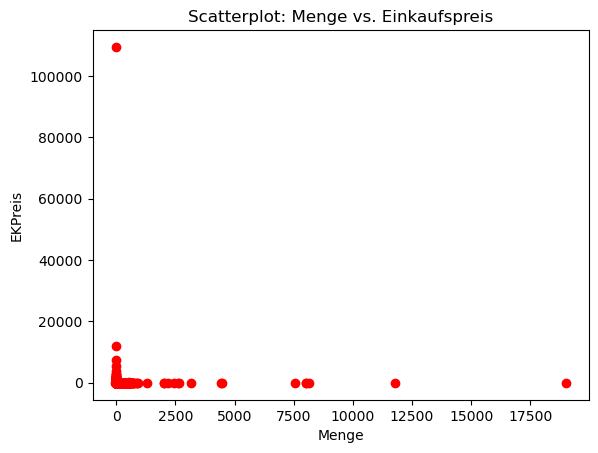

In [1586]:
import matplotlib.pyplot as plt
df_Belege['Menge'] = pd.to_numeric(df_Belege['Menge'], errors='coerce')
df_Belege['EKPreis'] = pd.to_numeric(df_Belege['EKPreis'], errors='coerce')


#scatterplot 
plt.scatter(df_Belege['Menge'], df_Belege['EKPreis'], color='red')
plt.title('Scatterplot: Menge vs. Einkaufspreis')
plt.xlabel('Menge')
plt.ylabel('EKPreis')

#plt.xlim(0, 200)  # Maximale Menge
#plt.ylim(0, 200)  # Maximaler Preis

plt.show()
#ansicht mit Scatterplot nicht ideal, deshabl boxplot

Ein Fahrgestell kostet 109500 daher der einzelne Punkte 

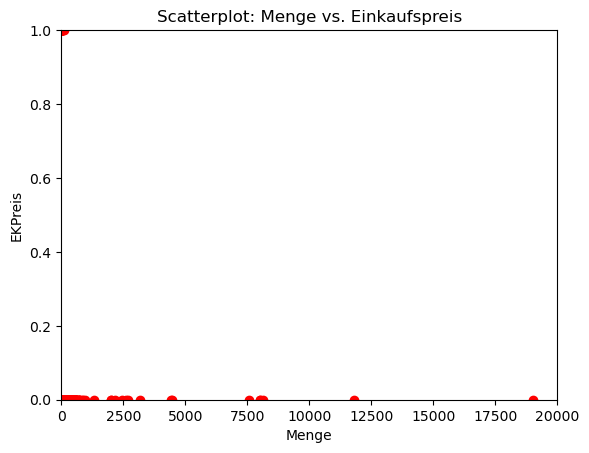

In [1587]:
import matplotlib.pyplot as plt
df_Belege['Menge'] = pd.to_numeric(df_Belege['Menge'], errors='coerce')
df_Belege['EKPreis'] = pd.to_numeric(df_Belege['EKPreis'], errors='coerce')

#scatterplot
plt.scatter(df_Belege['Menge'], df_Belege['EKPreis'], color='red')
plt.title('Scatterplot: Menge vs. Einkaufspreis')
plt.xlabel('Menge')
plt.ylabel('EKPreis')

plt.xlim(0, 20000)  # Maximale Menge
plt.ylim(0, 1)  # Maximaler Preis

plt.show()

Einkauspreis: Es gibt sehr viele LocalIDs die einen Einakaufspreis von 0 Euro. Der Median beträgt 0 Euro.

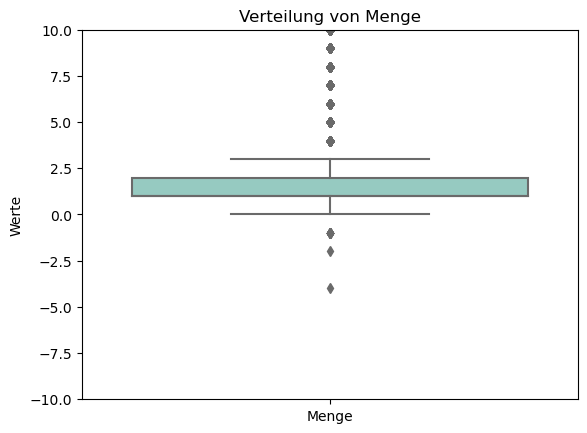

In [1737]:
import matplotlib.pyplot as plt
import seaborn as sns  

# Erstellung des Boxplots für 'Menge' und 'EKPreis'
sns.boxplot(data=df_Belege[['Menge']], palette='Set3')
plt.title('Verteilung von Menge')
plt.ylabel('Werte')
plt.ylim(-10, 10)


plt.show()


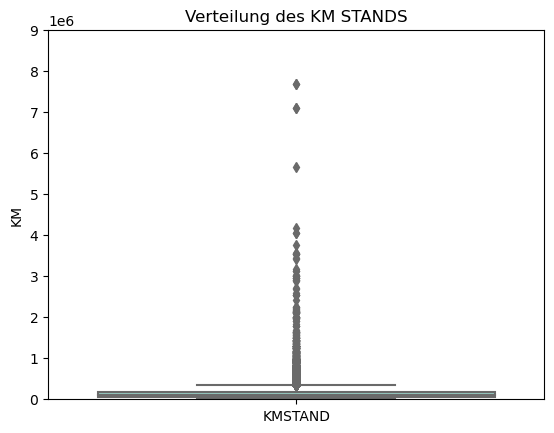

In [1679]:

# # wir erstellen die Boxplots für den KM Stand 
sns.boxplot(data=df_Belege[['KMSTAND']], palette='Set3')
plt.title('Verteilung des KM STANDS')
plt.ylabel('KM')
plt.ylim(0, 9000000)


plt.show()


Der maximale KMSTAND ist ungewöhnlich hoch mit 9 Mio Km 

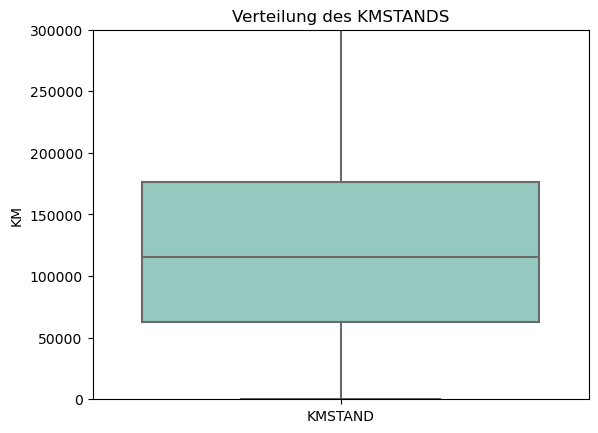

In [1680]:

# wir erstellen die Boxplots für den KM Stand 
sns.boxplot(data=df_Belege[['KMSTAND']], palette='Set3')
plt.title('Verteilung des KMSTANDS')
plt.ylabel('KM')
plt.ylim(0, 300000)


plt.show()


die meisten Fahrzeuge liegen zwischen ca. 60 000 und 190000.

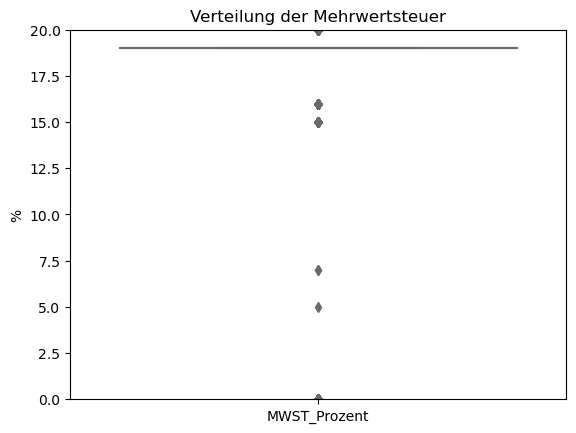

In [1677]:
# wir erstellen die Boxplots für die Mehrwertsteuer
sns.boxplot(data=df_Belege[['MWST_Prozent']], palette='Set3')
plt.title('Verteilung der Mehrwertsteuer')
plt.ylabel('%')
plt.ylim(0, 20)


plt.show()

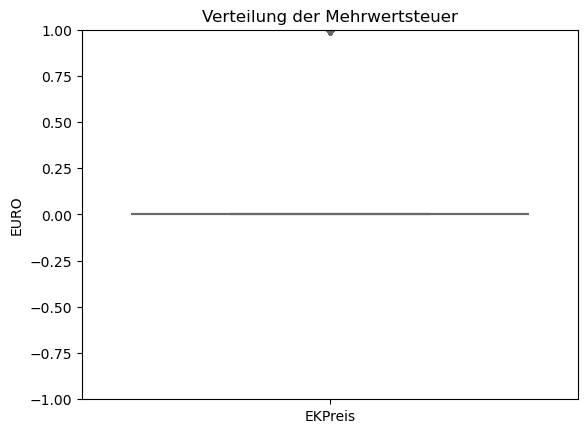

In [1704]:
# Wir erstellen den Boxplot für EKPreis
sns.boxplot(data=df_Belege[['EKPreis']], palette='Set3')
plt.title('Verteilung des Einkaufspreises')
plt.ylabel('EURO')
plt.ylim(-1, 1)


plt.show()

In [1738]:
#wir wollen so wissen, wo der Median vom VK Preis liegt 
df_Belege['VK_Preis'] = pd.to_numeric(df_Belege['VK_Preis'], errors='coerce')

median_vk_preis = df_Belege['VK_Preis'].median()

print(f"Median für VK_Preis: {median_vk_preis}")


Median für VK_Preis: 62.0


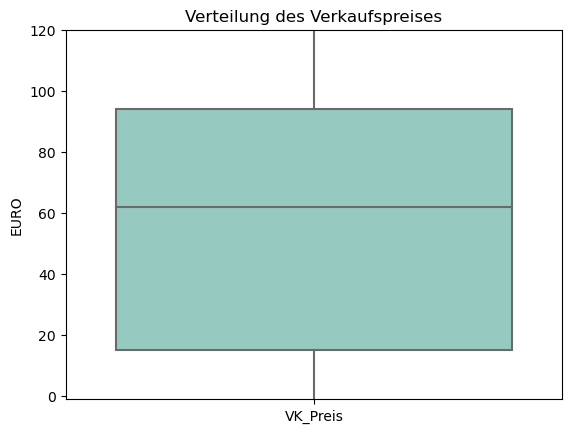

In [1728]:
# Wir erstellen so einen Boxplot für den VK Preis 
sns.boxplot(data=df_Belege[['VK_Preis']], palette='Set3')
plt.title('Verteilung des Verkaufspreises')
plt.ylabel('EURO')
plt.ylim(-1, 120)
plt.show()

In [1725]:
df_Belege.dtypes

LocalID                    object
BELEG_ART                  object
BELEGDATUM                float64
KTypNr                      int64
Fzg_Hersteller             object
ERSTZULASSUNG             float64
KMSTAND                     int64
POS_ART                    object
TEXT1                      object
GENARTNR                  float64
GENART_BEZ                 object
Menge                     float64
Mengeneinheit              object
VK_Preis                  float64
MWST_Prozent                int64
Minuten_pro_AW             object
PLZ                       float64
EKPreis                   float64
Pos_Text2                  object
Fzg_anlage_datum          float64
RechEmpfPLZ                object
RechEmpfAnrede             object
RechEmpfhatEMail           object
RechEmpfhatMobil           object
RechEmpfmitGeburtstag      object
Belegerstelltam           float64
Beleggedrucktam           float64
hatbelegversicherdaten     object
RechEmpfistVersichert      object
Programmvarian